In [159]:
import pandas as pd
import numpy as np
import operator
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
print('Imported')

Imported


Load data from cloud and store in dataframe df_car

In [18]:
path='https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
df_car = pd.read_csv(path)
df_car.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [19]:
df.shape

(204, 26)

We need to add headers for this df

In [20]:
df_car = pd.read_csv(path, sep = '\t', header = None)
df_car.head()

,0
0,"3,?,alfa-romero,gas,std,two,convertible,rwd,fr..."
1,"3,?,alfa-romero,gas,std,two,convertible,rwd,fr..."
2,"1,?,alfa-romero,gas,std,two,hatchback,rwd,fron..."
3,"2,164,audi,gas,std,four,sedan,fwd,front,99.80,..."
4,"2,164,audi,gas,std,four,sedan,4wd,front,99.40,..."


In [48]:
path='https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
df_car = pd.read_csv(path, header=None)
df_car.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [50]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df_car.columns = headers
df_car.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


**OK**, we got nice dataset. Then, we EDA this dataset. The first, check the info. As df_car above, we can see '?' on df_car['normalized']

In [51]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

All of the columns not null, so we will solve problem with columns have '?' in the value. First, change characters **'?'** to **null** 

In [52]:
df_car.replace("?", np.nan, inplace = True)
df_car.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN


Now, it's ok. If this dataset have any special characters more... **let's it be :v**

In [53]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

normalized-losses: 205-164 = 41 null values - > replace by mean (in fact, we can change it with mean of normalized by make. Because use mean by the same brand will more accuracy)
num-of-doors: 205-203 = 2 null values - > replace by mode
bore: 205 - 201 = 4 null values - > replace by mean
stroke : 205-201 = 4 null values - > replace by mean
horsepower: 205-203 = 2 null values - > replace by mean
peak-rpm: 205-203 = 2 null values - > replace by mean
price: 205-201 = 4 null values - > replace by 


replace null in **normalized-losses** with mean

In [56]:
mean_NorLos = df_car["normalized-losses"].astype("float").mean(axis=0)
df_car["normalized-losses"].replace(np.nan, mean_NorLos, inplace=True)

In [57]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

**num-of-doors** replace by mode

In [58]:
df_car['num-of-doors'].value_counts().idxmax()

'four'

In [60]:
df_car['num-of-doors'].replace(np.nan, "four", inplace=True)

In [61]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

**bore** replace by mean

In [65]:
mean_bore=df_car['bore'].astype('float').mean(axis=0)
df_car['bore'].replace(np.nan, mean_bore, inplace=True)

In [66]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

**stroke** replace by mean

In [67]:
mean_str = df_car['stroke'].astype('float').mean(axis = 0)
df_car['stroke'].replace(np.nan, mean_str, inplace = True)

In [68]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

**horsepower** - > replace by mean

In [71]:
mean_hor = df_car['horsepower'].astype('float').mean(axis=0)
df_car['horsepower'].replace(np.nan, mean_hor, inplace=True)
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

**peak-rpm** - > replace by mean

In [73]:
mean_pea=df_car['peak-rpm'].astype('float').mean(axis=0)
df_car['peak-rpm'].replace(np.nan, mean_pea, inplace=True)
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Only price is null. Price is value need to predict, so delete null better than replace them by mean

In [74]:
df_car.dropna(axis=0, inplace=True)
df_car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

change type normalized-losses,bore, stroke,peak-rpm,price to float

In [117]:
df_car[["normalized-losses","bore", "stroke","peak-rpm","horsepower","price"]] = df_car[["normalized-losses","bore", "stroke","peak-rpm","horsepower","price"]].astype("float")
df_car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

Nomalize data df_car[['length', 'width']]

In [124]:
df_car['length'] = df_car['length']/df_car['length'].max()
df_car['width'] = df_car['width']/df_car['width'].max()

### now, we have clean dataset.
Then, we check correlation to choosing the nice feature for modeling

In [125]:
df_car.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098267,-0.063561,-0.033956,-0.034636,0.082269


We can see that **Price** have good correlation with **length**, **width**, **curb-weight**, **engine-size**, **city-mpg**, **highway-mpg**, **horsepower**.Then, we can use P-Value to check it. If we have nice P-value. We absolute can use them to predict the price. 
P-value is < 0.001: strong correlation 
P-value is < 0.05: nearly strong correlation

In [126]:
from scipy import stats
print('Imported')

Imported


In [127]:
pearson_coef, p_value = stats.pearsonr(df_car['length'], df_car['price'])
print("Length vs Price:\n""Correlation", pearson_coef, "P-value =", p_value)  

Length vs Price:
Correlation 0.6906283804483642 P-value = 8.016477466158759e-30


In [128]:
pearson_coef, p_value = stats.pearsonr(df_car['width'], df_car['price'])
print("width vs Price:\n""Correlation", pearson_coef, "P-value =", p_value)
pearson_coef, p_value = stats.pearsonr(df_car['curb-weight'], df_car['price'])
print("curb-weight vs Price:\n""Correlation", pearson_coef, "P-value =", p_value)
pearson_coef, p_value = stats.pearsonr(df_car['engine-size'], df_car['price'])
print("engine-size vs Price:\n""Correlation", pearson_coef, "P-value =", p_value)
pearson_coef, p_value = stats.pearsonr(df_car['city-mpg'], df_car['price'])
print("city-mpg vs Price:\n""Correlation", pearson_coef, "P-value =", p_value)
pearson_coef, p_value = stats.pearsonr(df_car['highway-mpg'], df_car['price'])
print("highway-mpg vs Price:\n""Correlation", pearson_coef, "P-value =", p_value)
pearson_coef, p_value = stats.pearsonr(df_car['horsepower'], df_car['price'])
print("horsepower vs Price:\n""Correlation", pearson_coef, "P-value =", p_value)

width vs Price:
Correlation 0.7512653440522674 P-value = 9.200335510481516e-38
curb-weight vs Price:
Correlation 0.8344145257702846 P-value = 2.1895772388936914e-53
engine-size vs Price:
Correlation 0.8723351674455185 P-value = 9.265491622198389e-64
city-mpg vs Price:
Correlation -0.6865710067844677 P-value = 2.321132065567674e-29
highway-mpg vs Price:
Correlation -0.7046922650589529 P-value = 1.7495471144477352e-31
horsepower vs Price:
Correlation 0.809574567003656 P-value = 6.369057428259557e-48


So, all of that variables can use to **predict price**.
Let's predict price bro!

In [129]:
from sklearn.linear_model import LinearRegression
print('Imported')

Imported


In [130]:
lr = LinearRegression()

Predict **Price** with **length**, **width**, **curb-weight**, **engine-size**, **city-mpg**, **highway-mpg**.

In [131]:
#use length to predict price
x = df_car[['length']]
y = df_car['price']
lr.fit(x,y)

LinearRegression()

In [132]:
lr.intercept_

-64384.4363274216

In [133]:
lr.coef_

array([92690.65779928])

=> model Y = 445X - 64384 

In [134]:
r_sq = lr.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.47696755988073036


r2 = 0,47 => this model is not good

In [155]:
#use width to predict price
x = df_car[['width']]
y = df_car['price']
lr.fit(x,y)
yhat = lr.predict(x)
print('mode Y = ',lr.intercept_,'+', lr.coef_, 'x' )
r_sq = lr.score(x, y)
print('coefficient of determination:', r_sq)
print('Mean Square Error:', mean_squared_error(df_car['price'], yhat))

mode Y =  -173986.08728233702 + [204554.63587592] x
coefficient of determination: 0.5643996171739714
Mean Square Error: 27373849.048317783


r_square = 0,56 better than length but not good enought. We will try with next variables(curb-weight, engine-size, city-mpg, highway-mpg.)

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [156]:
#use curb-weight to predict price
x = df_car[['curb-weight']]
y = df_car['price']
lr.fit(x,y)
yhat = lr.predict(x)
print('mode Y = ',lr.intercept_,'+', lr.coef_, 'x' )
print('coefficient of determination:', lr.score(x, y))
print('Mean Square Error:', mean_squared_error(df_car['price'], yhat))

mode Y =  -19553.570636227483 + [12.818847] x
coefficient of determination: 0.6962476008164488
Mean Square Error: 19088303.525747165


<AxesSubplot:xlabel='curb-weight', ylabel='price'>

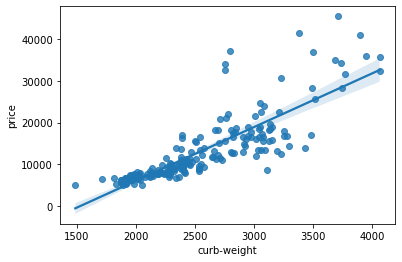

In [147]:
sns.regplot(x="curb-weight", y="price", data=df_car)

In [157]:
#use engine-size to predict price
x = df_car[['engine-size']]
y = df_car['price']
lr.fit(x,y)
yhat = lr.predict(x)
print('mode Y = ',lr.intercept_,'+', lr.coef_, 'x' )
print('coefficient of determination:', lr.score(x, y))
print('Mean Square Error:', mean_squared_error(df_car['price'], yhat))

mode Y =  -7963.338906281049 + [166.86001569] x
coefficient of determination: 0.7609686443622008
Mean Square Error: 15021126.02517414


<AxesSubplot:xlabel='engine-size', ylabel='price'>

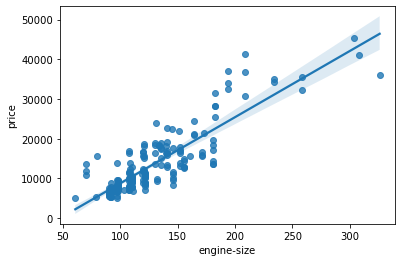

In [145]:
sns.regplot(x="engine-size", y="price", data=df_car)

In [ ]:
sns.regplot(x="engine-size", y="price", data=df)

In [138]:
#use city-mpgo to predict price
x = df_car[['city-mpg']]
y = df_car['price']
lr.fit(x,y)
print('mode Y = ',lr.intercept_,'+', lr.coef_, 'x' )
print('coefficient of determination:', lr.score(x, y))

mode Y =  34595.600842778265 + [-849.45322454] x
coefficient of determination: 0.4713797473570377


In [139]:
#use city-mpgo to predict price
x = df_car[['highway-mpg']]
y = df_car['price']
lr.fit(x,y)
print('mode Y = ',lr.intercept_,'+', lr.coef_, 'x' )
print('coefficient of determination:', lr.score(x, y))

mode Y =  38423.305858157386 + [-821.73337832] x
coefficient of determination: 0.4965911884339175


In [158]:
#use city-mpgo to predict price
x = df_car[['horsepower']]
y = df_car['price']
lr.fit(x,y)
yhat = lr.predict(x)
print('mode Y = ',lr.intercept_,'+', lr.coef_, 'x' )
print('coefficient of determination:', lr.score(x, y))
print('Mean Square Error:', mean_squared_error(df_car['price'], yhat))

mode Y =  -4597.558297892912 + [172.18312191] x
coefficient of determination: 0.6554109795391572
Mean Square Error: 21654544.39825428


<AxesSubplot:xlabel='horsepower', ylabel='price'>

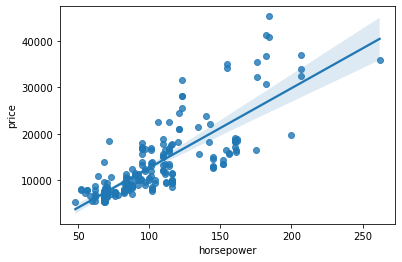

In [146]:
sns.regplot(x="horsepower", y="price", data=df_car)

### =>> horsepower, curb-weight and engine-size are the nice way to predict the price.
The best is 'engine-size' with model Y = -7963 + 166x with r_square is max(0.76) and MSE min(15021126)

In [177]:
x = df_car['horsepower']
y = df_car['price']
f = np.polyfit(x, y, 4) #polynomial of the 4rd order
p = np.poly1d(f)
print(p)
print('R_square:',r2_score(y, p(x)))
print('MSE:',mean_squared_error(df_car['price'], p(x)))

            4           3         2
-7.952e-05 x + 0.04269 x - 7.619 x + 698.6 x - 1.632e+04
R_square: 0.66691003743103
MSE: 20931924.567463852


2rd: 0.65     2.15+7
3rd: 0.66     2.12e+7
4rd: 0.66     2.09e+7


In [181]:
x = df_car['curb-weight']
y = df_car['price']
f = np.polyfit(x, y, 4) #polynomial of the 2rd order
p = np.poly1d(f)
print(p)
print('R_square:',r2_score(y, p(x)))
print('MSE:',mean_squared_error(df_car['price'], p(x)))

           4             3          2
8.384e-10 x - 8.757e-06 x + 0.0368 x - 61.04 x + 3.84e+04
R_square: 0.7203279493433993
MSE: 17575054.567307003


2rd: 0.71   1.76e+7
3rd: 0.72   1.75e+7
4rd: 0.72   1.75e+7

In [184]:
x = df_car['engine-size']
y = df_car['price']
f = np.polyfit(x, y, 4) #polynomial of the 2rd order
p = np.poly1d(f)
print(p)
print('R_square:',r2_score(y, p(x)))
print('MSE:',mean_squared_error(df_car['price'], p(x)))

            4            3         2
-8.664e-07 x - 0.006004 x + 3.482 x - 416 x + 2.144e+04
R_square: 0.7901542502358556
MSE: 13187054.245011818


2rd: 0.76   1.50e+7
3rd: 0.79   1.31e+7
4rd: 0.79   1.31e+7

The best model to predict price still is 'engine-size' r_square is max and MSE is min.

We can user Multiple linear regression or Polynomial regression with more than one dimension. But this task only require used Linear regression and Polynomial.